Andrei and I have different ideas about the gravity between two balls(or spheres) that are seperated at some distance(>R1+R2). So I write this piece of code and I want to verify that this situation is equivalent to putting two point mass at each center. 

Before coding I would like to explain my argument. Suppose we have two spheres 1 and 2, from the perspective of every mass element on shpere2, the total gravity this element feels from sphere 1 equals to the gravity when putting all the mass of sphere1 at its center, which therom is proved by calculus. So every element on sphere2 will find no difference if you replace sphere1 with a point mass with mass=mass1. Now you have point mass 1 and sphere 2, for the same argument, point mass 1 will find no difference if you replace sphere 2 with point mass 2. Done.

In [81]:
import numpy as np
from numpy import sin,cos,pi
import matplotlib.pyplot as plt

In [93]:
N1 = 20 # number of grid points in theta
N2 = 20 # number of grid points in phi
dt = pi/N1
dp = 2*pi/N2
theta1 = np.linspace(0,pi,num=N1,endpoint=True)
theta2 = np.linspace(0,pi,num=N1,endpoint=True)
phi1 = np.linspace(0,2*pi,num=N2,endpoint=True)
phi2 = np.linspace(0,2*pi,num=N2,endpoint=True)

#two spheres
x0,y0,z0 = 8,0,0
RR0 = x0**2 + y0**2 + z0**2
R1 = 3
R2 = 2.5

integral = np.zeros(3)

for t1 in theta1:
    for t2 in theta2:
        for p1 in phi1:
            for p2 in phi2:
                
                x1 = R1*sin(t1)*cos(p1)
                y1 = R1*sin(t1)*sin(p1)
                z1 = R1*cos(t1)
                
                x2 = R2*sin(t2)*cos(p2)+x0
                y2 = R2*sin(t2)*sin(p2)+y0
                z2 = R2*cos(t2) + z0
                
                RR = (x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2
                
                r_vector = np.array([x2-x1,y2-y1,z2-z1])
                r_unit_vector = r_vector/np.linalg.norm(r_vector)
                
                integral = integral + r_unit_vector * sin(t1)*sin(t2)*dt*dt*dp*dp/RR 

f = 16*pi**2/RR0
f_integral = np.linalg.norm(integral)
                
#print(integral)
print(f,f_integral)
print(100*(f-f_integral)/f)

2.4674011002723395 2.2736075055283886
7.854158560704253


If there will be any discrepancy, it will show up when R,R1,R2 are comparable. So here I make R1=3, R2=2.5, R=8. With 20*20 grid points, the error is~8%. This error could be due to the fact that dt,dp are not as small as we need. To support my arguement, error analysis is needed, which is performed following the 1+1 calculation.

In [94]:
#1 sphere + 1 point mass:
N1 = 20 # number of grid points in theta
N2 = 20 # number of grid points in phi
dt = pi/N1
dp = 2*pi/N2
theta1 = np.linspace(0,pi,num=N1,endpoint=True)
phi1 = np.linspace(0,2*pi,num=N2,endpoint=True)

x2,y2,z2 = 8,0,0
RR0 = x2**2 + y2**2 + z2**2
R1 = 3


integral = np.zeros(3)

for t1 in theta1:
    for p1 in phi1:
                
        x1 = R1*sin(t1)*cos(p1)
        y1 = R1*sin(t1)*sin(p1)
        z1 = R1*cos(t1)
        r_vector = np.array([x2-x1,y2-y1,z2-z1])        
        r12 = np.linalg.norm(r_vector)
                
        integral = integral + r_vector * sin(t1)*dt*dp/r12**3 

f = 4*pi/RR0
f_integral = np.linalg.norm(integral)
                
print(f,f_integral)
print(100*(f-f_integral)/f)

0.19634954084936207 0.19453838232547924
0.9224154617567152


I collected some error data. With that I did a simple error-analysis below for both cases at R0 = 8, I find that the error behavior with respect to #of grid points is logarithmic in both cases. So I claim that I am right, as long as I set up more grid points when doing integral, the error in 2-sphere case will converge to the analytical value, meaning the gravity between two spheres equals the gravity if you concentrate the mass of both spheres to their centers.

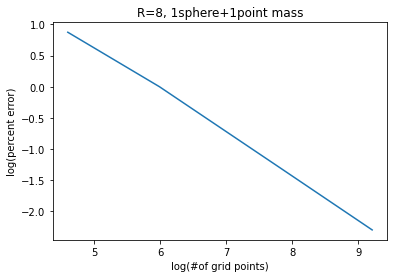

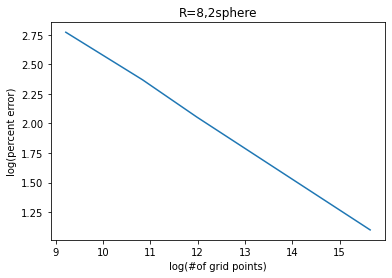

In [99]:
# 1+1, i.e. 1 sphere + 1 point mass
x0 = np.array([10,20,50,100])
y0 = np.array([2.4,1,0.27,0.1])
x1 = x0**2
x2 = np.log(x0**2)

y1 = y0
y2 = np.log(y0)

plt.figure()
plt.title('R=8, 1sphere+1point mass')
plt.plot(x2,y2)
plt.xlabel('log(#of grid points)')
plt.ylabel('log(percent error)')
#plt.legend()
plt.show()

#two spheres
x3 = np.log(np.array([10,15,20,50])**4)
y3 = np.log(np.array([16,10.7,7.8,3]))

plt.figure()
plt.title('R=8,2sphere')
plt.plot(x3,y3)
plt.xlabel('log(#of grid points)')
plt.ylabel('log(percent error)')
#plt.legend()
plt.show()